In [133]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Previewing Data

## Billionaires Dataset

In [35]:
billionaires = pd.read_csv('Billionaires Statistics Dataset.csv')
billionaires.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [36]:
billionaires.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [37]:
# which one's are we interested in?
interested = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'industries', 'countryOfCitizenship',
       'selfMade', 'status', 'gender', 'state',
       'residenceStateRegion', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country']
billionaires = billionaires[interested]

In [38]:
billionaires.shape

(2640, 23)

In [39]:
billionaires.describe()

,rank,finalWorth,age,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
count,2640.000000,2640.000000,2575.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03
mean,1289.159091,4623.787879,65.140194,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08
std,739.693726,9834.240939,13.258098,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08
min,1.000000,1000.000000,18.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04
25%,659.000000,1500.000000,56.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07
50%,1312.000000,2300.000000,65.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08
75%,1905.000000,4200.000000,75.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09
max,2540.000000,211000.000000,101.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09


## Income Inequality Dataset

In [40]:
income_inequality = pd.read_csv("economic-inequality-gini-index.csv")
income_inequality.head()

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605


In [41]:
# only preserving the most recent year of Gini index data
income_inequality = income_inequality.sort_values('Year')
income_inequality = income_inequality.groupby('Entity', as_index=False).last()

In [42]:
# because Argentina does not have a whole country GINI index
income_inequality.loc[income_inequality['Entity'] == 'Argentina - urban', 'Entity'] = 'Argentina'
income_inequality.loc[income_inequality['Entity'] == 'Argentina', 'Code'] = 'ARG'

In [43]:
# dropping rows that are not complete countries
income_inequality = income_inequality[~income_inequality['Entity'].str.contains('rural|urban')]

In [44]:
income_inequality.shape

(168, 4)

In [45]:
income_inequality.describe()

,Year,Gini coefficient
count,168.000000,168.000000
mean,2016.125000,0.374058
std,4.632853,0.076865
min,1992.000000,0.232323
25%,2015.000000,0.320521
50%,2018.000000,0.360834
75%,2019.000000,0.418654
max,2021.000000,0.630261


Text(0.5, 1.0, 'Distribution of Gini Coefficients')

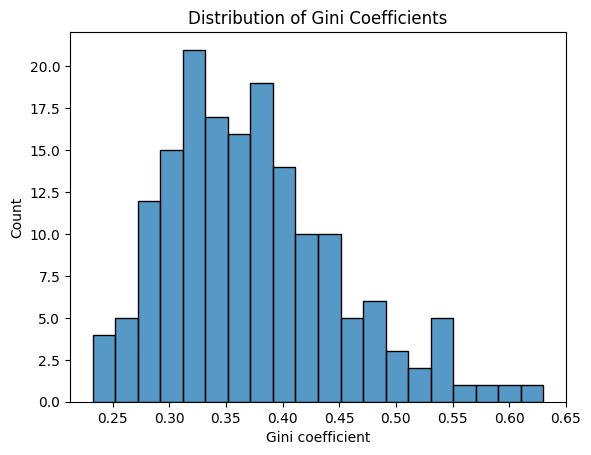

In [46]:
sns.histplot(income_inequality['Gini coefficient'], bins=20)
plt.title('Distribution of Gini Coefficients')

## Female Labor Force Participation Dataset

In [47]:
labor_force = pd.read_csv("Labor Force Participation Rate (2022).csv")
labor_force = labor_force.rename(columns={labor_force.columns[-1]: "participation_rate"})
labor_force = labor_force.drop(columns=['Year'])
labor_force.head()

,Economy,Economy Code,participation_rate
0,Aruba,ABW,NaN
1,Afghanistan,AFG,NaN
2,Angola,AGO,74.884
3,Albania,ALB,52.270
4,Andorra,AND,NaN


Text(0.5, 1.0, 'Distribution of Female Labor Force Participation Rate')

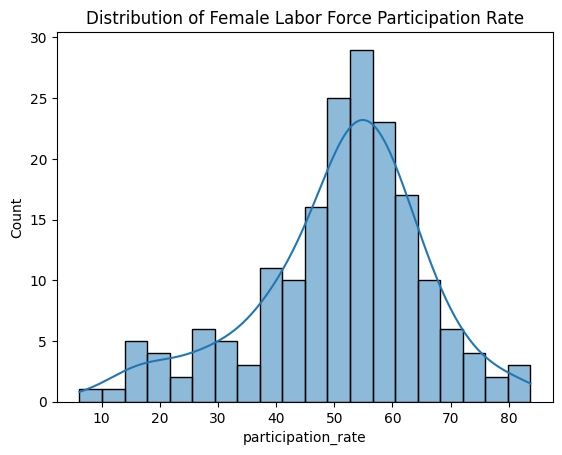

In [48]:
sns.histplot(data=labor_force, x='participation_rate', kde=True, bins=20)
plt.title('Distribution of Female Labor Force Participation Rate')

In [49]:
labor_force.participation_rate.describe()

count    183.000000
mean      50.938044
std       14.556205
min        6.196000
25%       44.040000
50%       52.920000
75%       60.166000
max       83.726000
Name: participation_rate, dtype: float64

# Cleaning and Preprocessing

In [50]:
billionaires.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
industries                                       0
countryOfCitizenship                             0
selfMade                                         0
status                                           0
gender                                           0
state                                         1887
residenceStateRegion                          1893
cpi_country                                    184
cpi_change_country                             184
gdp_country                                    164
gross_tertiary_education_enrollment            182
gross_primary_education_enrollment_country     181
life_expectancy_country        

In [51]:
# filling missing values for country with countryOfCitizenship
billionaires['country'] = billionaires['country'].fillna(billionaires['countryOfCitizenship'])

In [52]:
#Correct data types
#Convert 'gdp_country' to float, remove dollar signs and commas
billionaires['gdp_country'] = billionaires['gdp_country'].replace('[\$,]', '',
                                                                  regex=True).astype(float)

In [53]:
income_inequality.isnull().sum()

Entity              0
Code                0
Year                0
Gini coefficient    0
dtype: int64

In [54]:
labor_force.isnull().sum()

Economy                0
Economy Code           0
participation_rate    34
dtype: int64

In [55]:
# because we are only looking at one variable here, we can drop all rows with any NA values
labor_force.dropna(inplace=True)
income_inequality.rename(columns={'Year': 'Gini_Year'}, inplace=True)
income_labor = pd.merge(income_inequality, labor_force, left_on='Code', right_on='Economy Code', how='outer')

# for countries in the labor dataset but not income inequality, fill in country name with economy name
income_labor.loc[income_labor['Code'].isnull(), 'Entity'] = income_labor.Economy

In [56]:
# Check the countries in 'billionaires' dataframe that are not in 'income_labor' dataframe
not_in_income_labor = billionaires[~billionaires['country'].isin(income_labor['Entity'])]

# Number of such countries
num_not_in_income_labor = not_in_income_labor['country'].nunique()
print("Number of countries that are in 'billionaires' but not in 'income_labor': ", num_not_in_income_labor)

Number of countries that are in 'billionaires' but not in 'income_labor':  12


In [57]:
# Get the countries in 'billionaires' dataframe that are not in 'income_labor' dataframe
not_in_income_labor = billionaires[~billionaires['country'].isin(income_labor['Entity'])]

# Print the unique countries
print("Countries that are in 'billionaires' but not in 'income_labor':\n", not_in_income_labor['country'].unique())

Countries that are in 'billionaires' but not in 'income_labor':
 ['Hong Kong' 'Monaco' 'Czech Republic' 'Eswatini (Swaziland)' 'Bahamas'
 'Cayman Islands' 'Bermuda' 'British Virgin Islands' 'Guernsey'
 'Liechtenstein' 'Turks and Caicos Islands' 'Andorra']


In [58]:
# changing the names of countries in billionaires to match country names in income_labor
british_territories = ['Cayman Islands', 'Bermuda', 'British Virgin Islands', 'Turks and Caicos Islands']

billionaires.loc[billionaires['country']=='Hong Kong', 'country'] = 'Hong Kong SAR, China'
billionaires.loc[billionaires['country']=='Czech Republic', 'country'] = 'Czechia'
billionaires.loc[billionaires['country']=='Eswatini (Swaziland)', 'country'] = 'Eswatini'
billionaires.loc[billionaires['country'].isin(british_territories), 'country'] = 'Virgin Islands (U.S.)'
billionaires.loc[billionaires['country']=='Guernsey', 'country'] = 'Channel Islands'

# showing countries in the billionaires dataset that do not have income inequality nor labor data
not_in_income_labor = billionaires[~billionaires['country'].isin(income_labor['Entity'])]

print("Countries that are in 'billionaires' but not in 'income_labor':\n", not_in_income_labor['country'].unique())

Countries that are in 'billionaires' but not in 'income_labor':
 ['Monaco' 'Bahamas' 'Liechtenstein' 'Andorra']


In [59]:
income_labor = income_labor.drop(columns=['Economy', 'Economy Code'])
final_df = pd.merge(billionaires, income_labor, left_on='country', right_on='Entity', how='left')

In [60]:
# only 21 billionaires are missing both income inequality and labor data
final_df[final_df.Entity.isnull()].shape

(21, 28)

In [61]:
final_df.drop(columns=['Entity', 'countryOfCitizenship'], inplace=True) # might also want to drop code
final_df.rename(columns={'Inequality in income (2021)': 'income_inequality', 'HDI Rank (2021)': 'HDI'}, inplace=True)

In [62]:
final_df.shape

(2640, 26)

# Demographic Analysis of Billionaires

## 1. Age Analysis

count    2575.000000
mean       65.140194
std        13.258098
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64


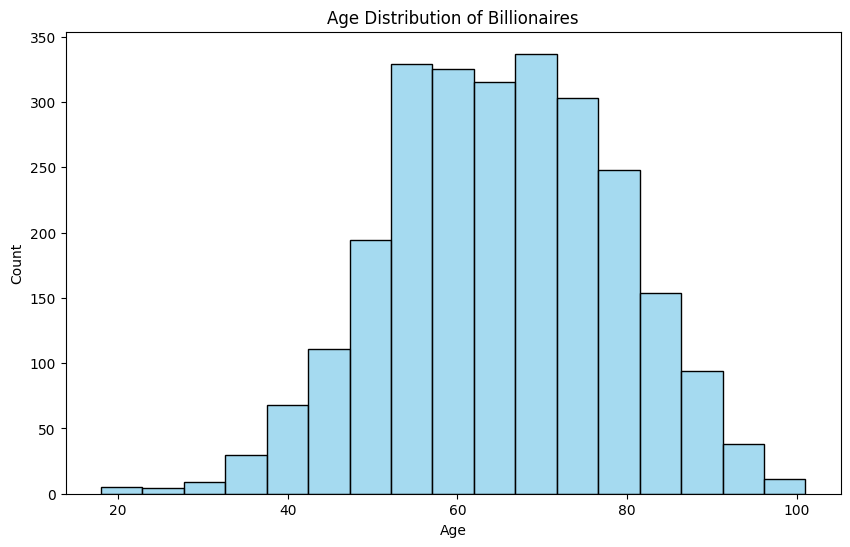

In [63]:
print(final_df['age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(final_df['age'].dropna(), kde=False, color='skyblue', binwidth=5)
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 2. Gender

gender
M    2303
F     337
Name: count, dtype: int64


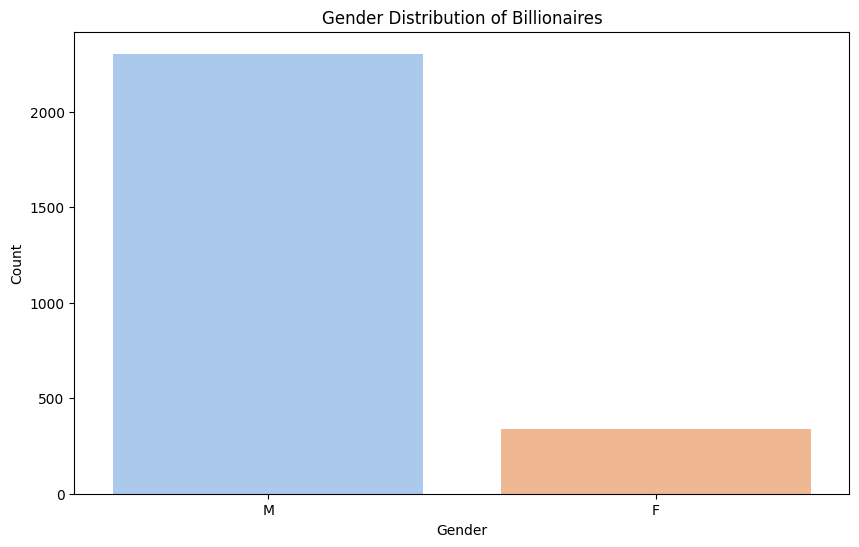

In [64]:
print(final_df['gender'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=final_df, palette='pastel')
plt.title('Gender Distribution of Billionaires')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 3. Industry

industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64


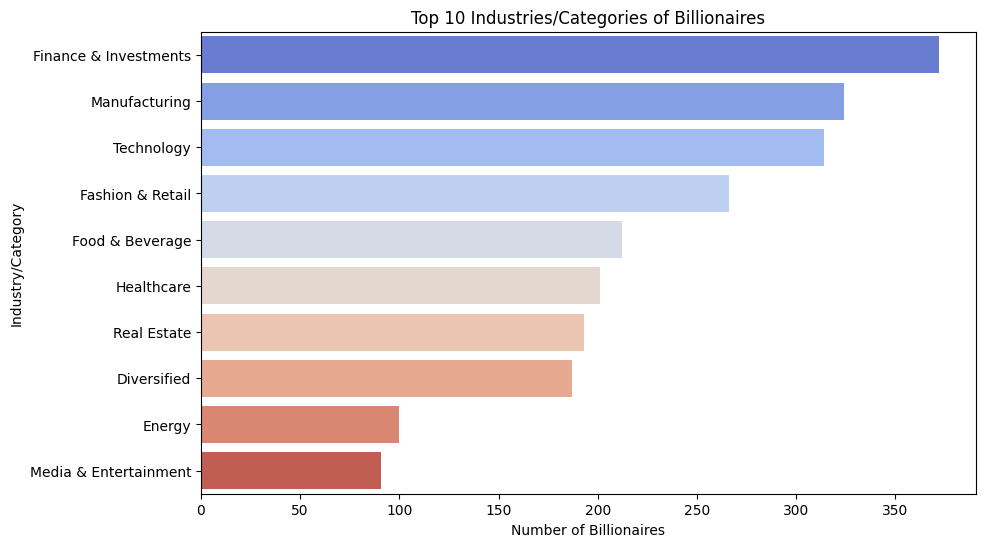

In [65]:
print(final_df['industries'].value_counts())

plt.figure(figsize=(10, 6))
top_categories = billionaires['industries'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title('Top 10 Industries/Categories of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Industry/Category')
plt.show()

## 4. Wealth

count      2640.000000
mean       4623.787879
std        9834.240939
min        1000.000000
25%        1500.000000
50%        2300.000000
75%        4200.000000
max      211000.000000
Name: finalWorth, dtype: float64


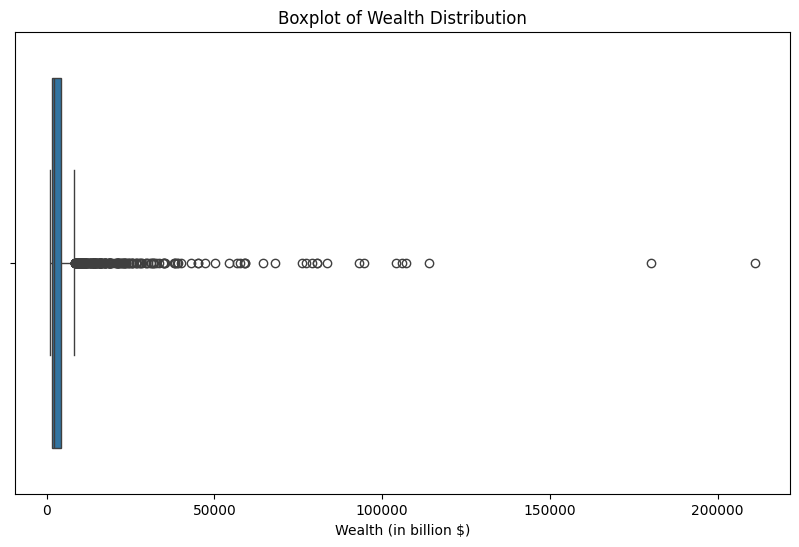

In [66]:
print(final_df['finalWorth'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['finalWorth'])
plt.title('Boxplot of Wealth Distribution')
plt.xlabel('Wealth (in billion $)')
plt.show()

## 5. Geographic distribution

country
United States     755
China             523
India             160
Germany           112
United Kingdom     84
                 ... 
Portugal            1
Georgia             1
Colombia            1
Uzbekistan          1
Panama              1
Name: count, Length: 76, dtype: int64


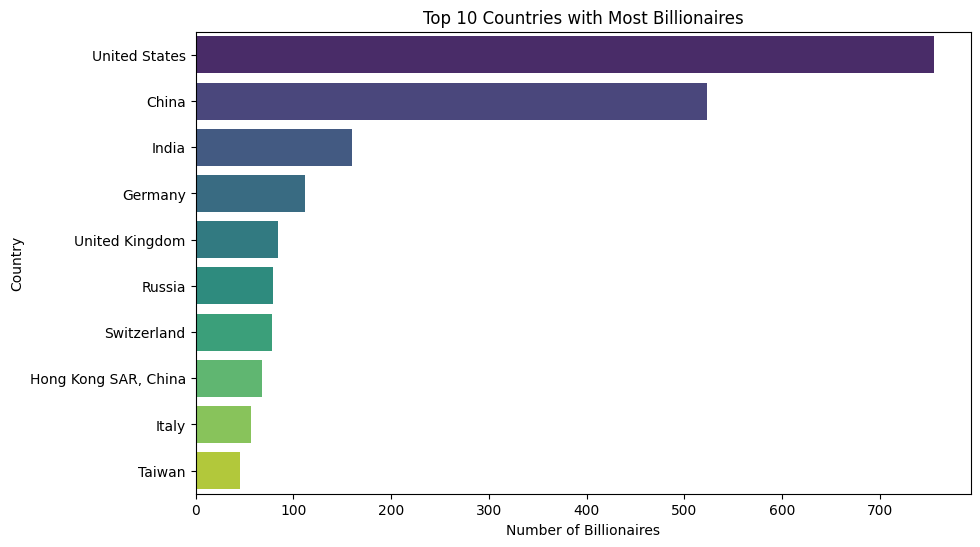

In [67]:
print(final_df['country'].value_counts())

plt.figure(figsize=(10, 6))
top_countries = billionaires['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.show()

# Correlational Analysis: Economic Indicators and Billionaire Wealth

In [70]:
#Explore how finalWorth correlates with various economic indicators like gdp_country and total_tax_rate_country

# Aggregate relevant data by country
finalworth = final_df.groupby('country')['finalWorth'].mean().reset_index()
economic_ind = final_df.groupby('country')[['cpi_country', 'cpi_change_country', 
                                           'gdp_country', 'gross_tertiary_education_enrollment', 
                                           'gross_primary_education_enrollment_country', 
                                           'tax_revenue_country_country', 
                                           'total_tax_rate_country']].mean().reset_index()

merged_data = pd.merge(finalworth, economic_ind, on='country', how='inner')

#Replace NA values in each column with that column's mode value
for column in merged_data.columns[1:]:
    mode_value = merged_data[column].mode()[0]
    merged_data[column].fillna(mode_value, inplace=True)


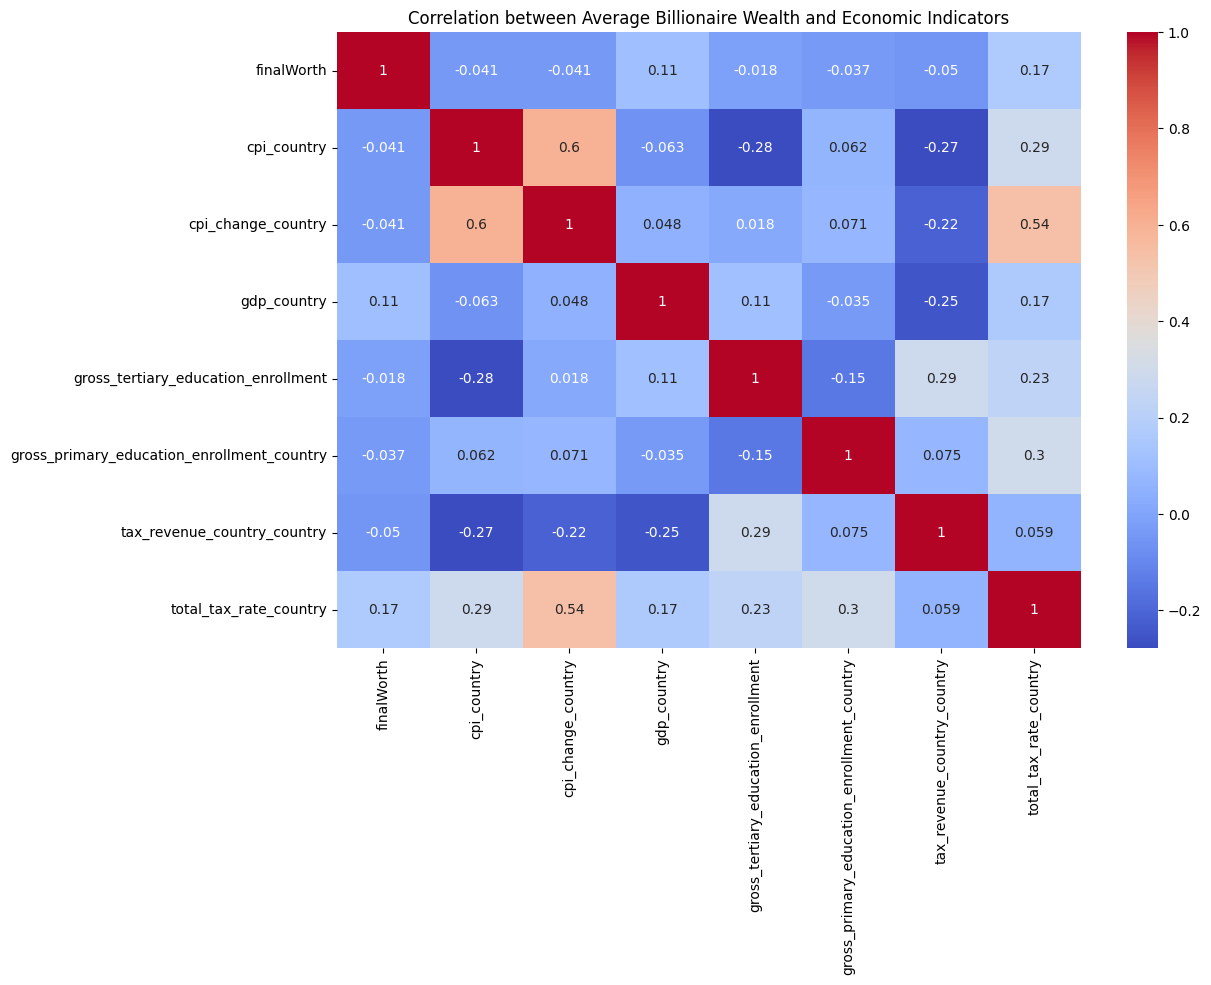

In [74]:
merged_data.set_index('country', inplace=True)
wealth_economic_corr = merged_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(wealth_economic_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Average Billionaire Wealth and Economic Indicators")
plt.show()

# Correlational Analysis: Billionaire Wealth and Income Inequality

should we do average billionaire wealth in that country instead of sum?

                            OLS Regression Results                            
Dep. Variable:       Gini coefficient   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6309
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.430
Time:                        20:05:21   Log-Likelihood:                 74.208
No. Observations:                  63   AIC:                            -144.4
Df Residuals:                      61   BIC:                            -140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3518      0.010     35.313      0.0

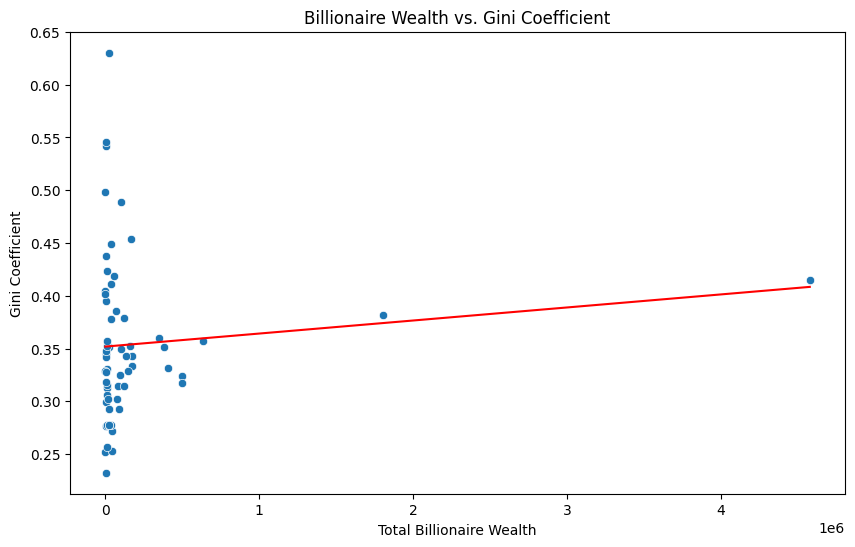

In [75]:
country_agg = final_df.groupby('country').agg({'finalWorth': 'sum', 'Gini coefficient': 'median'}).reset_index()
country_agg = country_agg.dropna()

X = country_agg[['finalWorth']]
y = country_agg['Gini coefficient']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='finalWorth', y='Gini coefficient', data=country_agg)
sns.lineplot(x=country_agg['finalWorth'], y=model.predict(X), color='red') 
plt.title('Billionaire Wealth vs. Gini Coefficient')
plt.xlabel('Total Billionaire Wealth')
plt.ylabel('Gini Coefficient')
plt.show()

The R-squared and adjusted R-squared values indicate that the model does a poor job explaining variations in income inequality. The F-statistic value suggests that the overall model is not statistically significant, the  finalWorth variable does not provide a good fit for predicting the Gini coefficient. As a result, we conclude that there is no significant linear relationship between the total wealth of billionaires in a country (finalWorth) and the country's income inequality (as measured by the Gini coefficient).

# Wealth Origins (Self-Made vs. Inherited Wealth)

In [76]:
income_inequality['Gini coefficient'].describe()

count    168.000000
mean       0.374058
std        0.076865
min        0.232323
25%        0.320521
50%        0.360834
75%        0.418654
max        0.630261
Name: Gini coefficient, dtype: float64

In [77]:
low_gini = 0.32
high_gini = 0.42

final_df['gini_cat'] = np.select([final_df['Gini coefficient'] < low_gini,
                                  final_df['Gini coefficient'] > high_gini],
                                ['Low', 'High'], default='Medium')
final_df.gini_cat.value_counts()


gini_cat
Medium    2246
Low        314
High        80
Name: count, dtype: int64

In [79]:
# turning gini_cat into an ordered categorical variable
categories = ['Low', 'Medium', 'High']
final_df['gini_cat'] = pd.Categorical(final_df['gini_cat'], categories=categories, ordered=True)

gini_cat
Medium    2246
Low        314
High        80
Name: count, dtype: int64

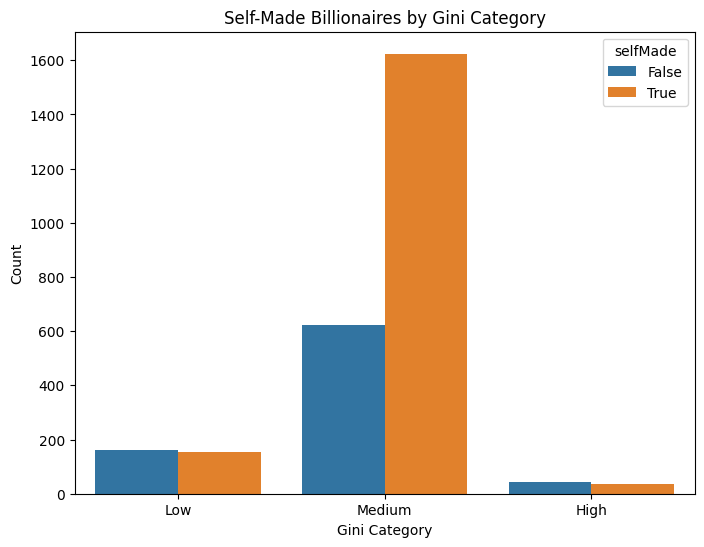

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(data=final_df, x='gini_cat', hue='selfMade')
plt.title('Self-Made Billionaires by Gini Category')
plt.xlabel('Gini Category')
plt.ylabel('Count')
plt.show()

In [81]:
final_df.groupby('gini_cat')['selfMade'].value_counts(normalize=True)

gini_cat  selfMade
Low       False       0.512739
          True        0.487261
Medium    True        0.723063
          False       0.276937
High      False       0.562500
          True        0.437500
Name: proportion, dtype: float64

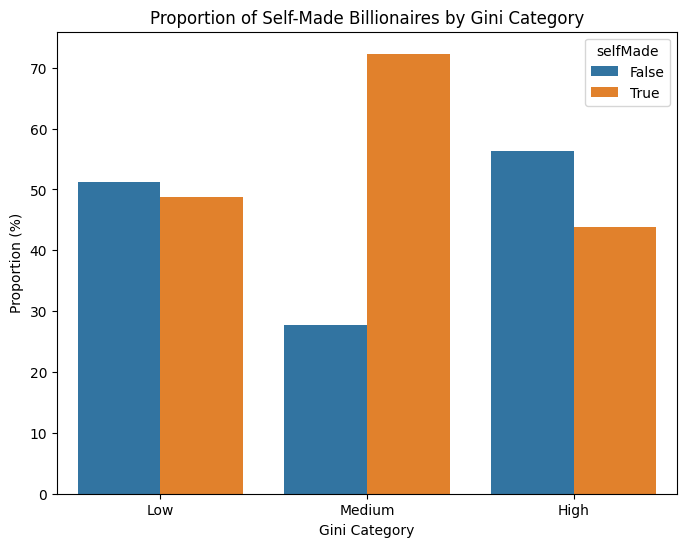

In [82]:
proportion = final_df.groupby('gini_cat')['selfMade'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=proportion, x='gini_cat', y='Proportion', hue='selfMade')
plt.title('Proportion of Self-Made Billionaires by Gini Category')
plt.xlabel('Gini Category')
plt.ylabel('Proportion (%)')

plt.show()


In [83]:
# Create a contingency table
contingency_table = final_df.groupby('gini_cat')['selfMade'].value_counts().unstack()

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 94.89178529232609
p-value: 2.4803366742575173e-21


P-value of 2.48e-21 indicates that there is a significant association between the Gini category of the billionaire's home country and the self-made status of billionaires. 

In high inequality countries, here is a higher proportion of billionaires with inherited wealth compared to self-made billionaires. This could be due to the concentration of wealth within a few families or individuals, creating dynasties of inherited wealth. Factors contributing to this could include limited access to resources, educational disparities, and unequal opportunities for wealth creation among different socioeconomic groups. The presence of established and powerful family-owned businesses could also contribute to the higher proportion of inherited wealth among billionaires.

In medium-inequality countries there is a higher proportion of self-made billionaires compared to those with inherited wealth. This could be due to a more level playing field where individuals have better access to education, opportunities, and resources to create wealth on their own merits. Entrepreneurship, innovation, and meritocracy might play more significant roles in wealth creation in these countries. There might be less concentration of wealth within a few families or individuals, leading to a more diverse pool of self-made billionaires.

In some societies with low inequality, there might be less emphasis on entrepreneurship or risk-taking due to a more secure and stable socioeconomic environment. Consequently, fewer individuals might actively pursue creating new businesses or ventures, leading to a higher proportion of wealth passed down through inheritance rather than self-made wealth.

In [168]:
numerical_variables = [
 'finalWorth',
 'age',
 'cpi_country',
 'cpi_change_country',
 'gdp_country',
 'gross_tertiary_education_enrollment',
 'gross_primary_education_enrollment_country',
 'life_expectancy_country',
 'tax_revenue_country_country',
 'total_tax_rate_country',
 'Gini coefficient',
 'participation_rate'
 ]

# Perform ANOVA for each variable
for variable in numerical_variables:
    groups = [group[variable].dropna() for _, group in final_df.groupby('selfMade')]
    f_statistic, p_value = f_oneway(*groups)
    if p_value < 0.05:
        print(f"{variable}; Difference in means: {(groups[0].mean() - groups[1].mean())/(groups[0].mean())*100:.2f}%")
        print(f"Means: Inherited - {groups[0].mean()}, Self-Made - {groups[1].mean()}")
        print()

age; Difference in means: 2.20%
Means: Inherited - 66.14993646759848, Self-Made - 64.69574944071589

gdp_country; Difference in means: -69.25%
Means: Inherited - 7819293376514.286, Self-Made - 13233949913562.754

gross_primary_education_enrollment_country; Difference in means: 2.20%
Means: Inherited - 104.46290322580644, Self-Made - 102.16250728862974

life_expectancy_country; Difference in means: 0.55%
Means: Inherited - 78.42193808882907, Self-Made - 77.9932361516035

tax_revenue_country_country; Difference in means: 13.20%
Means: Inherited - 13.819946091644205, Self-Made - 11.995160349854228

total_tax_rate_country; Difference in means: -7.03%
Means: Inherited - 41.90767160161508, Self-Made - 44.85393586005831

Gini coefficient; Difference in means: -2.64%
Means: Inherited - 0.3691599839661899, Self-Made - 0.3789132863509587

participation_rate; Difference in means: -8.87%
Means: Inherited - 51.67776441102757, Self-Made - 56.26124437869823



# Gender Differences and Disparities

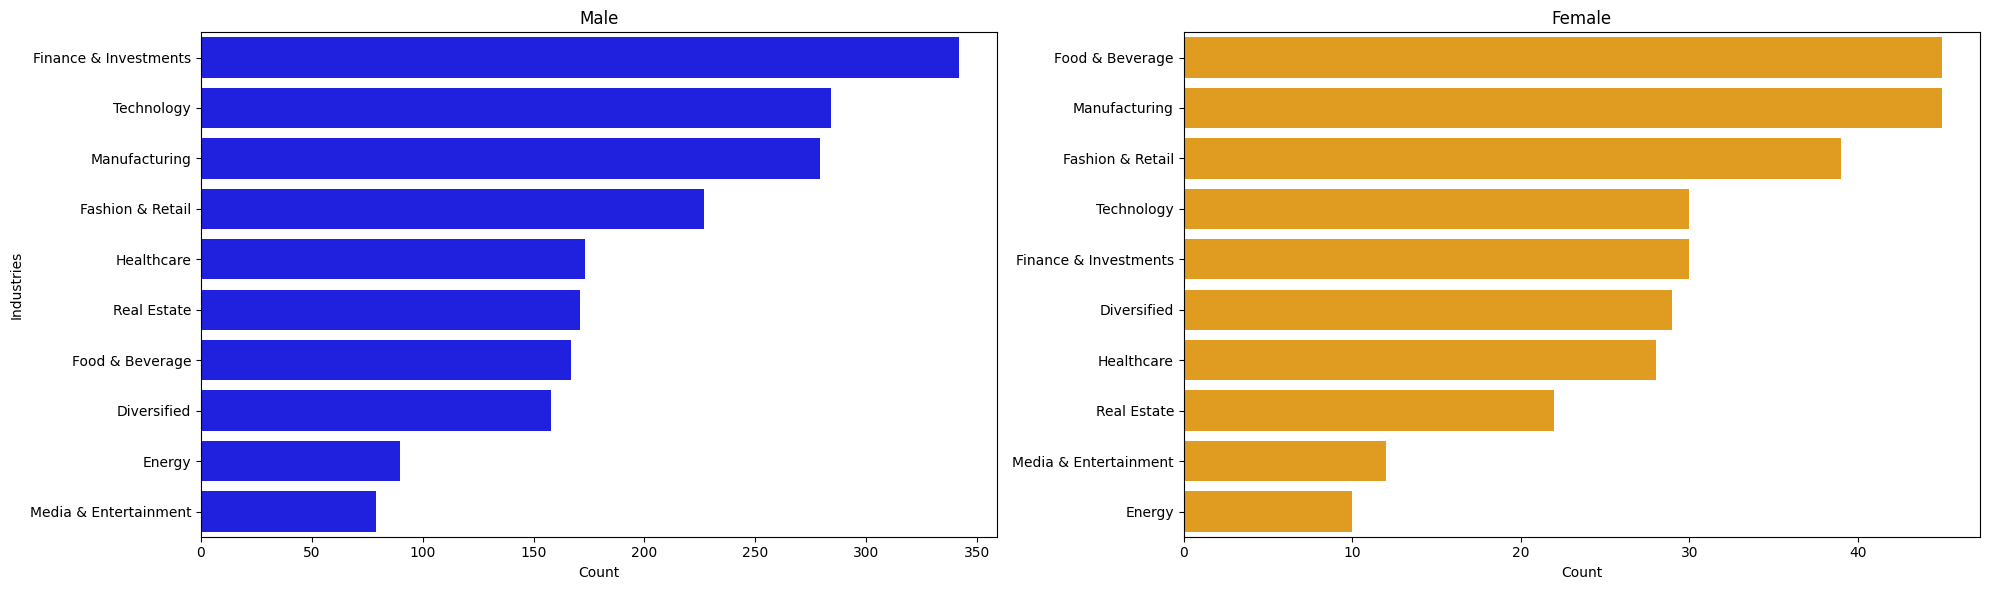

In [112]:
# Create new dataframe with top industries only
top_industries = final_df['industries'].value_counts().head(10).index.tolist()
filtered_df = final_df[final_df['industries'].isin(top_industries)]

# Separate dataframes for males and females
male_df = filtered_df[filtered_df['gender'] == 'M']
female_df = filtered_df[filtered_df['gender'] == 'F']

# Start plotting
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

# Find the order to plot
male_order = male_df['industries'].value_counts().index
female_order = female_df['industries'].value_counts().index

# Plot for males
sns.countplot(data=male_df, y='industries', color='blue', ax=axs[0], order=male_order)
axs[0].set_title('Male')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Industries')

# Plot for females
sns.countplot(data=female_df, y='industries', color='orange', ax=axs[1], order=female_order)
axs[1].set_title('Female')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [169]:
numerical_variables = [
 'finalWorth',
 'age',
 'cpi_country',
 'cpi_change_country',
 'gdp_country',
 'gross_tertiary_education_enrollment',
 'gross_primary_education_enrollment_country',
 'life_expectancy_country',
 'tax_revenue_country_country',
 'total_tax_rate_country',
 'Gini coefficient',
 'participation_rate',
 'selfMade'
 ]
# Perform ANOVA for each variable
for variable in numerical_variables:
    groups = [group[variable].dropna() for _, group in final_df.groupby('gender')]
    f_statistic, p_value = f_oneway(*groups)
    if p_value < 0.05:
        print(f"Variable: {variable}, p-value: {p_value}")
        print("Mean for Female:", groups[0].mean())
        print("Mean for Male:", groups[1].mean())
        print()

Variable: age, p-value: 0.0245635535234838
Mean for Female: 63.54397394136808
Mean for Male: 65.35626102292768

Variable: cpi_country, p-value: 0.000264019549562288
Mean for Female: 122.57944078947367
Mean for Male: 128.48635223048328

Variable: gross_tertiary_education_enrollment, p-value: 0.0071512557586097154
Mean for Female: 70.30657894736844
Mean for Male: 66.79085422469824

Variable: life_expectancy_country, p-value: 4.217768878204011e-06
Mean for Female: 79.04243421052631
Mean for Male: 77.99303621169916

Variable: tax_revenue_country_country, p-value: 0.0014266479303423252
Mean for Female: 13.464802631578948
Mean for Male: 12.416535067347889

Variable: selfMade, p-value: 1.5400960183591827e-68
Mean for Female: 0.28486646884273
Mean for Male: 0.7451150673035172



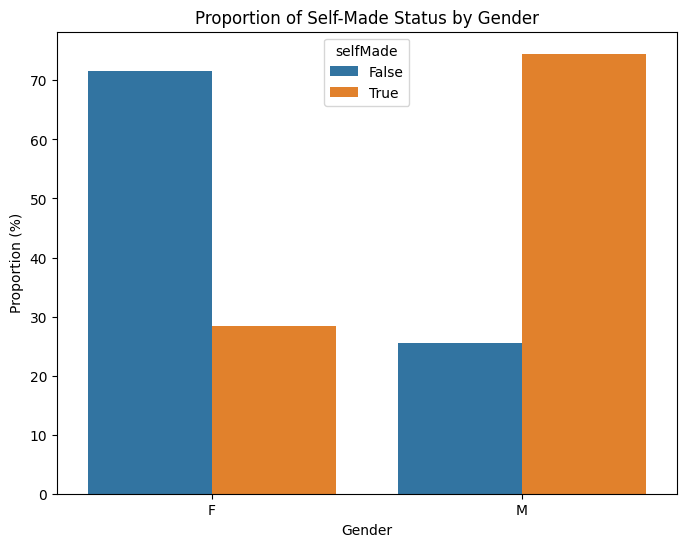

In [172]:

# Calculate the proportion of selfMade statuses by gender
proportion = final_df.groupby('gender')['selfMade'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=proportion, x='gender', y='Proportion', hue='selfMade')
plt.title('Proportion of Self-Made Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')

plt.show()


In [ ]:
final_df.gender.value_counts(normalize=True)

gender
M    0.872348
F    0.127652
Name: proportion, dtype: float64

In [101]:
top_20_countries = final_df.country.value_counts().head(20).index.tolist()
top_20 = final_df[final_df.country.isin(top_20_countries)]

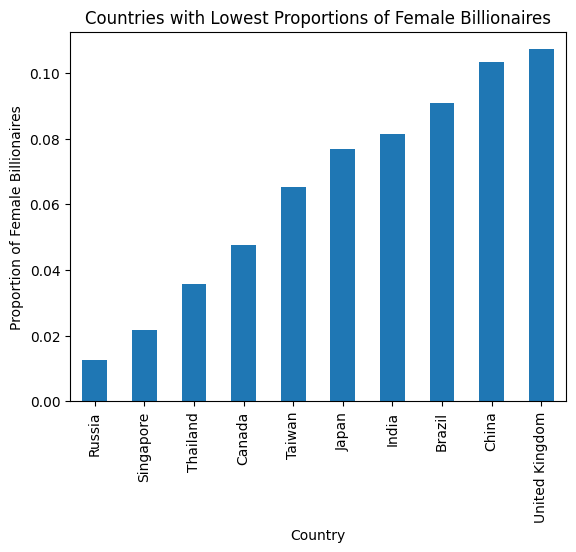

In [102]:
# Grouping data by country and gender, counting the number of billionaires
grouped = top_20.groupby(['country', 'gender']).size().unstack()

# Calculating proportions of Female billionaires for each country
grouped['Total'] = grouped.sum(axis=1)
grouped['Female_Proportion'] = grouped['F'] / grouped['Total']
lowest_female = grouped.sort_values(by='Female_Proportion').head(10)

lowest_female['Female_Proportion'].plot(kind='bar')
plt.title('Countries with Lowest Proportions of Female Billionaires')
plt.xlabel('Country')
plt.ylabel('Proportion of Female Billionaires')
plt.show()

Text(0.5, 1.0, 'Relationship between proportion of female billionaires and female labor force participation rate')

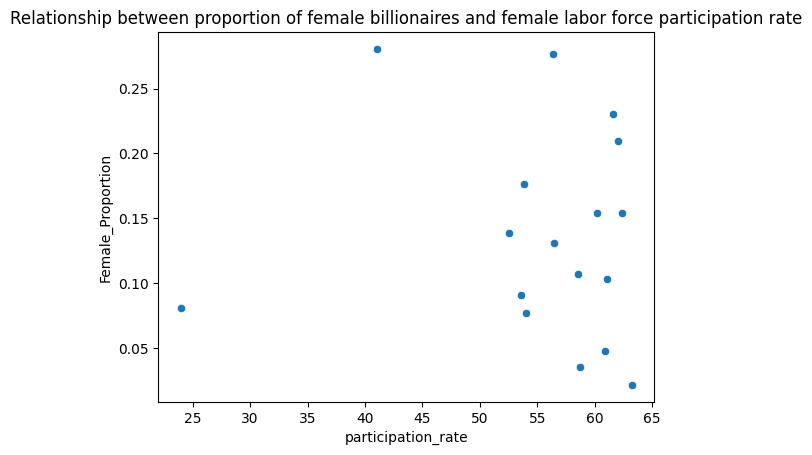

In [103]:
gender_merge = pd.merge(grouped, labor_force[['Economy','participation_rate']], left_on='country', right_on='Economy', how='left')
sns.scatterplot(data=gender_merge, x='participation_rate', y='Female_Proportion')
plt.title('Relationship between proportion of female billionaires and female labor force participation rate')

In [109]:
gender_merge.dropna(inplace=True)
X = gender_merge['participation_rate']
y = gender_merge['Female_Proportion']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
r_squared = model.rsquared

print(f"R-squared value: {r_squared}")

R-squared value: 0.00461137181372584


Very low correlation. Rate of female billionaires low everywhere.

Explanation: As we can see, female labor force participation is highest in some of the poorest and richest countries in the world, while it is lowest in countries with incomes somewhere in between. In other words: in a cross-section, the relationship between female participation rates and GDP per capita follows a U-shape.

https://ourworldindata.org/female-labor-supply

In [142]:
final_df.groupby('gini_cat')['participation_rate'].mean()

gini_cat
Low       56.187832
Medium    54.723510
High      52.031188
Name: participation_rate, dtype: float64

<Axes: xlabel='gini_cat', ylabel='participation_rate'>

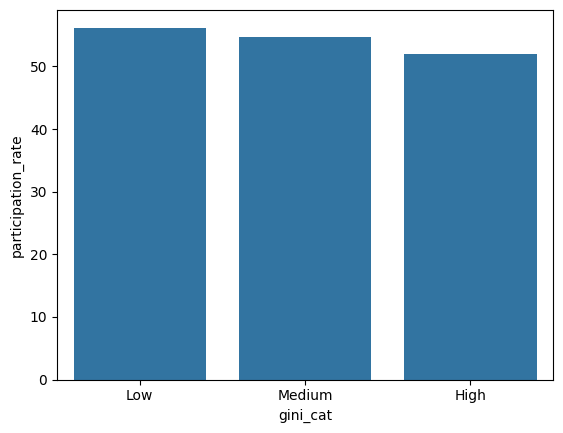

In [147]:
sns.barplot(final_df.groupby('gini_cat')['participation_rate'].mean())

In [145]:
low_group = final_df[final_df['gini_cat'] == 'Low']['participation_rate'].dropna()
medium_group = final_df[final_df['gini_cat'] == 'Medium']['participation_rate'].dropna()
high_group = final_df[final_df['gini_cat'] == 'High']['participation_rate'].dropna()

f_statistic, p_value = f_oneway(low_group, medium_group, high_group)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 6.0076740579768915
p-value: 0.002495673358664541


In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine the groups into a single array
all_groups = [low_group, medium_group, high_group]
labels = ['Low', 'Medium', 'High']
combined_data = np.concatenate(all_groups)

# Create the group labels
group_labels = np.repeat(labels, [len(group) for group in all_groups])

# Perform Tukey's test
tukey_results = pairwise_tukeyhsd(combined_data, group_labels)

# Print the results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   4.1566 0.0023  1.2512 7.0621   True
  High Medium   2.6923 0.0394  0.1024 5.2823   True
   Low Medium  -1.4643  0.055 -2.9528 0.0242  False
---------------------------------------------------
